In [1]:
import geopandas as gpd

### Explorando os dados geográficos

In [ ]:
rj = gpd.read_file('/content/drive/MyDrive/Cursos/Avançando em Data Science com Python/Dados geográficos/rj_setores_censitarios/33SEE250GC_SIR.shp')
rj

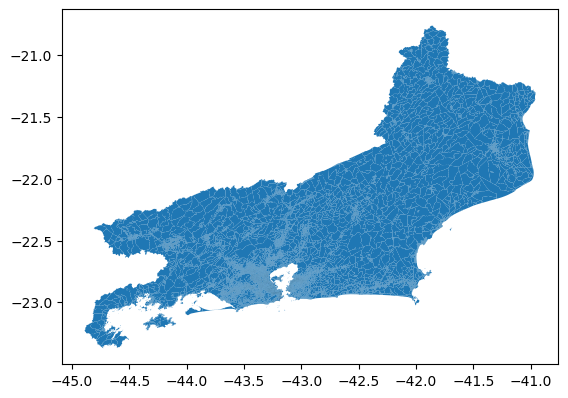

In [3]:
rj.plot();

In [ ]:
cidade_rio = rj[rj['NM_MUNICIP'] == 'RIO DE JANEIRO']
cidade_rio

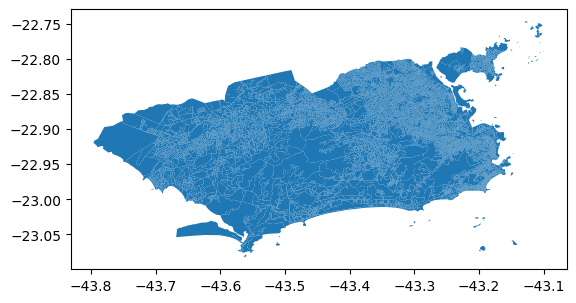

In [5]:
cidade_rio.plot();

In [6]:
import folium

In [ ]:
mapa_rio = folium.Map(location= [-22, -43],
                      zoom_start=8)
mapa_rio

In [ ]:
mapa_rio = folium.Map(location= [-22, -43],
                      zoom_start=8)

folium.TileLayer('cartodbpositron', name = 'Positron').add_to(mapa_rio)
folium.TileLayer('cartodbdark_matter', name = 'Dark').add_to(mapa_rio)
folium.TileLayer('https://{s}.tile-cyclosm.openstreetmap.fr/cyclosm/{z}/{x}/{y}.png', name = 'OSM',
                 attr = '<a href="https://github.com/cyclosm/cyclosm-cartocss-style/releases" title="CyclOSM - Open Bicycle render">CyclOSM</a> | Map data: &copy; <a href="https://www.openstreetmap.org/copyright">OpenStreetMap</a> contributors').add_to(mapa_rio)

folium.LayerControl().add_to(mapa_rio)

mapa_rio.save('mapa_rio.html')

mapa_rio

In [ ]:
bairros_rio = cidade_rio.dissolve(by='NM_BAIRRO')
bairros_rio

In [ ]:
mapa_rio = folium.Map(location= [-22, -43],
                      zoom_start=8,
                      tiles = 'cartodbpositron')

folium.GeoJson(bairros_rio).add_to(mapa_rio)

mapa_rio

In [ ]:
cidade = cidade_rio.dissolve(by='NM_MUNICIP')
cidade

In [ ]:
mapa_rio = folium.Map(location= [-22, -43],
                      zoom_start=8,
                      tiles = 'cartodbpositron')

folium.GeoJson(cidade).add_to(mapa_rio)

mapa_rio

### Analisando os dados dos imóveis

In [13]:
import pandas as pd

In [ ]:
imoveis = pd.read_csv('/content/drive/MyDrive/Cursos/Avançando em Data Science com Python/Dados geográficos/rj_setores_censitarios/dados.csv', sep='\t')
imoveis

In [ ]:
imoveis = gpd.GeoDataFrame(imoveis,
                           geometry=gpd.points_from_xy(imoveis['Longitude'],
                                                       imoveis['Latitude']))
imoveis

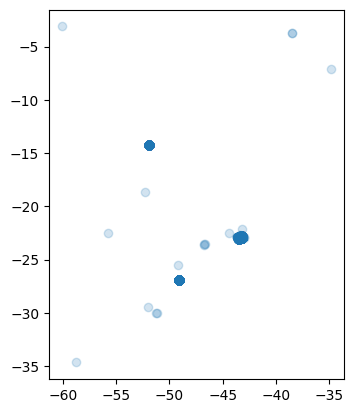

In [16]:
base = cidade.plot()
imoveis.plot(ax=base, alpha=0.2);

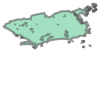

In [17]:
cidade['geometry'].iloc[0]

In [ ]:
imoveis['geometry'].within(cidade['geometry'].iloc[0])

In [19]:
imoveis = imoveis[imoveis['geometry'].within(cidade['geometry'].iloc[0])]

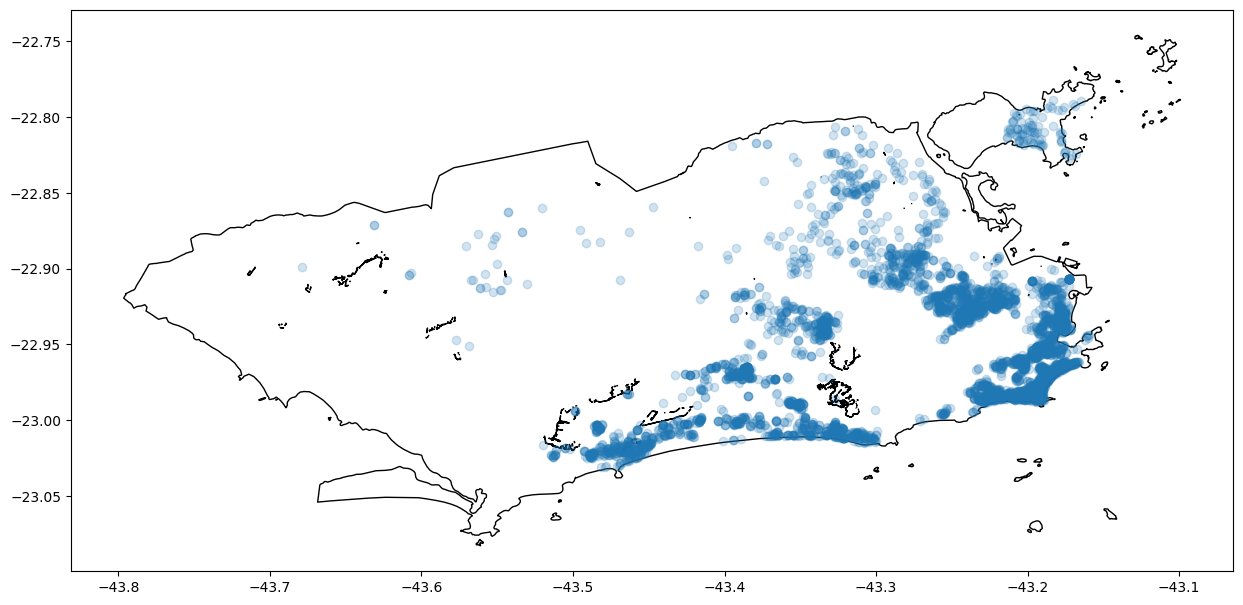

In [20]:
base = cidade.plot(color='white', edgecolor='black', figsize=(15,8))
imoveis.plot(ax=base, alpha=0.2);

In [21]:
from folium.plugins import HeatMap

In [ ]:
mapa_rio = folium.Map(location= [imoveis['Latitude'].mean(), imoveis['Longitude'].mean()],
                      zoom_start=10,
                      tiles = 'cartodbpositron')

HeatMap(data=imoveis[['Latitude', 'Longitude']]).add_to(mapa_rio)

mapa_rio

In [ ]:
mapa_rio = folium.Map(location= [imoveis['Latitude'].mean(), imoveis['Longitude'].mean()],
                      zoom_start=10,
                      tiles = 'cartodbpositron')

HeatMap(data=imoveis[['Latitude', 'Longitude']], name='Mapa de Calor').add_to(mapa_rio)
folium.GeoJson(cidade, name='Rio de Janeiro').add_to(mapa_rio)

folium.LayerControl().add_to(mapa_rio)

mapa_rio

In [ ]:
mapa_rio = folium.Map(location= [imoveis['Latitude'].mean(), imoveis['Longitude'].mean()],
                      zoom_start=10,
                      tiles = 'cartodbdark_matter')

estilo = {'fillOpacity':0 ,'color' : '#ffffff', 'weight': 0.5}

HeatMap(data=imoveis[['Latitude', 'Longitude']], name='Mapa de Calor', radius=20).add_to(mapa_rio)
folium.GeoJson(cidade, name='Rio de Janeiro', style_function= lambda x: estilo).add_to(mapa_rio)

folium.LayerControl().add_to(mapa_rio)

mapa_rio

In [ ]:
mapa_rio = folium.Map(location= [imoveis['Latitude'].mean(), imoveis['Longitude'].mean()],
                      zoom_start=10,
                      tiles = 'cartodbdark_matter',
                      name='Dark')

estilo = {'fillOpacity':0 ,'color' : '#ffffff', 'weight': 0.5}

HeatMap(data=imoveis[['Latitude', 'Longitude']], name='Mapa de Calor', radius=20).add_to(mapa_rio)
folium.GeoJson(bairros_rio, name='Rio de Janeiro', style_function= lambda x: estilo).add_to(mapa_rio)

estilo_borda_preta = {'fillOpacity':0 ,'color' : '#000000', 'weight': 0.5}

HeatMap(data=imoveis[['Latitude', 'Longitude']], name='Mapa de Calor (vermelho)', radius=20, gradient={0: 'grey', 1: 'red'}, show=False).add_to(mapa_rio)
folium.GeoJson(bairros_rio, name='Rio de Janeiro (borda preta)', style_function= lambda x: estilo_borda_preta, show=False).add_to(mapa_rio)

folium.TileLayer('cartodbpositron', name='Positron').add_to(mapa_rio)

folium.LayerControl().add_to(mapa_rio)

mapa_rio

In [ ]:
bairros_rio

In [ ]:
bairros_rio.crs

In [ ]:
mapa_rio = folium.Map(location= [imoveis['Latitude'].mean(), imoveis['Longitude'].mean()],
                      zoom_start=10,
                      tiles = 'cartodbdark_matter')

estilo = {'fillOpacity':0 ,'color' : '#ffffff', 'weight': 0.5}

HeatMap(data=imoveis[['Latitude', 'Longitude']], name='Mapa de Calor', radius=20).add_to(mapa_rio)

for indice, linha in bairros_rio.iterrows():
  bairro = gpd.GeoDataFrame(pd.DataFrame(linha).T, geometry='geometry', crs='EPSG:4674')
  folium.GeoJson(bairro, name=bairro.index[0], style_function= lambda x: estilo, tooltip = bairro.index[0]).add_to(mapa_rio)

folium.LayerControl().add_to(mapa_rio)

mapa_rio.save('mapa_calor_rio.html')

mapa_rio

### Análise detalhada

In [ ]:
mapa_rio = folium.Map(location= [imoveis['Latitude'].mean(), imoveis['Longitude'].mean()],
                      zoom_start=10,
                      tiles = 'cartodbpositron')

folium.GeoJson(cidade, name='Rio de Janeiro').add_to(mapa_rio)

amostra_imoveis = imoveis.sample(500)

amostra_imoveis.apply(
    lambda linha: folium.Marker(
        location=[linha['Latitude'],
                  linha['Longitude']],
    ).add_to(mapa_rio), axis=1
)


folium.LayerControl().add_to(mapa_rio)

mapa_rio

In [ ]:
mapa_rio = folium.Map(location= [imoveis['Latitude'].mean(), imoveis['Longitude'].mean()],
                      zoom_start=10,
                      tiles = 'cartodbpositron')

folium.GeoJson(cidade, name='Rio de Janeiro').add_to(mapa_rio)

amostra_imoveis = imoveis.sample(500)

amostra_imoveis.apply(
    lambda linha: folium.Marker(
        location=[linha['Latitude'],
                  linha['Longitude']],
        icon = folium.Icon(color='red')
    ).add_to(mapa_rio), axis=1
)


folium.LayerControl().add_to(mapa_rio)

mapa_rio

In [ ]:
imoveis.describe()

In [32]:
imoveis.insert(0, 'cor', pd.qcut(imoveis['Valor'], q = [0, 0.5, 0.75, 1], labels = ['green', 'orange', 'red']))

In [ ]:
mapa_rio = folium.Map(location= [imoveis['Latitude'].mean(), imoveis['Longitude'].mean()],
                      zoom_start=10,
                      tiles = 'cartodbpositron')

folium.GeoJson(cidade, name='Rio de Janeiro').add_to(mapa_rio)

amostra_imoveis = imoveis.sample(500)

amostra_imoveis.apply(
    lambda linha: folium.Marker(
        location=[linha['Latitude'],
                  linha['Longitude']],
        icon = folium.Icon(color = linha['cor'], icon = 'fa-home', prefix = 'fa')
    ).add_to(mapa_rio), axis=1
)


folium.LayerControl().add_to(mapa_rio)

mapa_rio

In [ ]:
mapa_rio = folium.Map(location= [imoveis['Latitude'].mean(), imoveis['Longitude'].mean()],
                      zoom_start=10,
                      tiles = 'cartodbpositron')

estilo = {'fillOpacity':0 ,'color' : '#000000', 'weight': 0.5}

for indice, linha in bairros_rio.iterrows():
  bairro = gpd.GeoDataFrame(pd.DataFrame(linha).T, geometry='geometry', crs='EPSG:4674')
  folium.GeoJson(bairro, name=bairro.index[0], style_function= lambda x: estilo, tooltip = bairro.index[0]).add_to(mapa_rio)

amostra_imoveis = imoveis.sample(500)

amostra_imoveis.apply(
    lambda linha: folium.Marker(
        location=[linha['Latitude'],
                  linha['Longitude']],
        icon = folium.Icon(color = linha['cor'], icon = 'fa-home', prefix = 'fa')
    ).add_to(mapa_rio), axis=1
)


folium.LayerControl().add_to(mapa_rio)

mapa_rio

In [ ]:
mapa_rio = folium.Map(location= [imoveis['Latitude'].mean(), imoveis['Longitude'].mean()],
                      zoom_start=10,
                      tiles = 'cartodbpositron')

estilo = {'fillOpacity':0 ,'color' : '#000000', 'weight': 0.5}

for indice, linha in bairros_rio.iterrows():
  bairro = gpd.GeoDataFrame(pd.DataFrame(linha).T, geometry='geometry', crs='EPSG:4674')
  folium.GeoJson(bairro, name=bairro.index[0], style_function= lambda x: estilo, tooltip = bairro.index[0]).add_to(mapa_rio)

amostra_imoveis = imoveis.sample(500)

amostra_imoveis.apply(
    lambda linha: folium.Marker(
        location=[linha['Latitude'],
                  linha['Longitude']],
        icon = folium.Icon(color = linha['cor'], icon = 'fa-home', prefix = 'fa'),
        popup = f'Área: {linha['Area']} m², Valor: R$ {linha['Valor']}'
    ).add_to(mapa_rio), axis=1
)


folium.LayerControl().add_to(mapa_rio)

mapa_rio

In [ ]:
mapa_rio = folium.Map(location= [imoveis['Latitude'].mean(), imoveis['Longitude'].mean()],
                      zoom_start=10,
                      tiles = 'cartodbpositron')

estilo = {'fillOpacity':0 ,'color' : '#000000', 'weight': 0.5}

for indice, linha in bairros_rio.iterrows():
  bairro = gpd.GeoDataFrame(pd.DataFrame(linha).T, geometry='geometry', crs='EPSG:4674')
  folium.GeoJson(bairro, name=bairro.index[0], style_function= lambda x: estilo, tooltip = bairro.index[0]).add_to(mapa_rio)

amostra_imoveis = imoveis.sample(500)

amostra_imoveis.apply(
    lambda linha: folium.Marker(
        location=[linha['Latitude'],
                  linha['Longitude']],
        icon = folium.Icon(color = linha['cor'], icon = 'fa-home', prefix = 'fa'),
         popup = folium.Popup(f'''<b>Bairro</b>: {linha["Bairro"]}<br>
                                <b>Área</b>: {linha["Area"]} m²<br>
                                <b>Valor</b>: R$ {linha["Valor"]},00<br>
                                <b>Quartos</b>: {linha["Quartos"]}
                            ''',
                             max_width = 200,
                             sticky = True)
    ).add_to(mapa_rio), axis=1
)


folium.LayerControl().add_to(mapa_rio)

mapa_rio

In [37]:
from folium.plugins import FastMarkerCluster

In [ ]:
mapa_rio = folium.Map(location= [imoveis['Latitude'].mean(), imoveis['Longitude'].mean()],
                      zoom_start=10,
                      tiles = 'cartodbpositron')

estilo = {'fillOpacity':0 ,'color' : '#000000', 'weight': 0.5}

for indice, linha in bairros_rio.iterrows():
  bairro = gpd.GeoDataFrame(pd.DataFrame(linha).T, geometry='geometry', crs='EPSG:4674')
  folium.GeoJson(bairro, name=bairro.index[0], style_function= lambda x: estilo, tooltip = bairro.index[0]).add_to(mapa_rio)

cluster = FastMarkerCluster(imoveis[['Latitude', 'Longitude']])

cluster.add_to(mapa_rio)

folium.LayerControl().add_to(mapa_rio)

mapa_rio

In [39]:
from folium.plugins import MarkerCluster

In [ ]:
mapa_rio = folium.Map(location= [imoveis['Latitude'].mean(), imoveis['Longitude'].mean()],
                      zoom_start=10,
                      tiles = 'cartodbpositron')

estilo = {'fillOpacity':0 ,'color' : '#000000', 'weight': 0.5}

for indice, linha in bairros_rio.iterrows():
  bairro = gpd.GeoDataFrame(pd.DataFrame(linha).T, geometry='geometry', crs='EPSG:4674')
  folium.GeoJson(bairro, name=bairro.index[0], style_function= lambda x: estilo, tooltip = bairro.index[0]).add_to(mapa_rio)

cluster = MarkerCluster()

imoveis.apply(
    lambda linha: folium.Marker(
        location=[linha['Latitude'],
                  linha['Longitude']],
        icon = folium.Icon(color = linha['cor'], icon = 'fa-home', prefix = 'fa'),
         popup = folium.Popup(f'''<b>Bairro</b>: {linha["Bairro"]}<br>
                                <b>Área</b>: {linha["Area"]} m²<br>
                                <b>Valor</b>: R$ {linha["Valor"]},00<br>
                                <b>Quartos</b>: {linha["Quartos"]}
                            ''',
                             max_width = 200,
                             sticky = True)
    ).add_to(cluster), axis=1
)

cluster.add_to(mapa_rio)

folium.LayerControl().add_to(mapa_rio)

mapa_rio

In [ ]:
bairros_rio = bairros_rio.reset_index()
bairros_rio

In [ ]:
for indice in range(len(bairros_rio)):
  display(imoveis[imoveis['geometry'].within(bairros_rio['geometry'].iloc[indice])])
  print(bairros_rio['NM_BAIRRO'].iloc[indice])

In [44]:
imoveis.insert(0, 'NM_BAIRRO', '')

In [45]:
for indice in range(len(bairros_rio)):
  imoveis.loc[imoveis['geometry'].within(bairros_rio['geometry'].iloc[indice]), 'NM_BAIRRO'] = bairros_rio['NM_BAIRRO'].iloc[indice]

In [ ]:
imoveis

In [ ]:
imoveis.head()

In [ ]:
estatisticas_bairros = imoveis.groupby('NM_BAIRRO')[['Valor', 'Tipo', 'Area']].agg({'Valor': ['min', 'mean', 'max'], 'Tipo': 'count', 'Area': ['min', 'max']})
estatisticas_bairros

In [ ]:
estatisticas_bairros = estatisticas_bairros.droplevel(level = 0, axis = 1).reset_index()
estatisticas_bairros.columns = ['NM_BAIRRO', 'preco_min', 'preco_medio', 'preco_max', 'qtd_imoveis', 'area_min', 'area_max']
estatisticas_bairros